*** 1. Import the required libraries ***

In [202]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

*** 2. Read the data as a Data Frame ***

In [203]:
df = pd.read_csv('insurance.csv')

*** 3. EDA on the Data ***

*** 3.a Shape of the Data ***

In [204]:
df.shape

(1338, 7)

*** 3.b Data Types of each label ***

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


*** 3.c Find out the Missing Values ***

In [206]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [207]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

*** 3.d 5 Point Summary of the data ***

In [208]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


*** 3.e Distribution of Age, BMI and Charges *** 

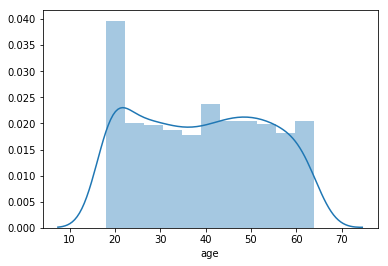

In [209]:
sns.distplot(df['age'])

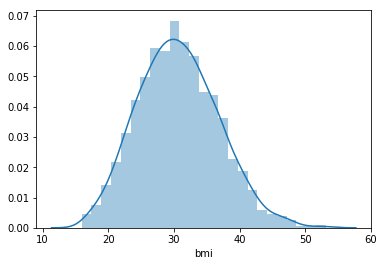

In [210]:
sns.distplot(df['bmi'])

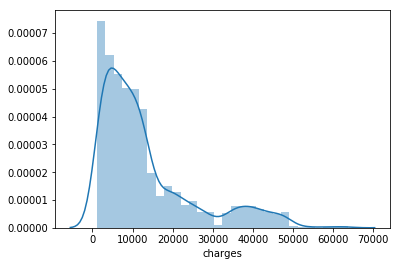

In [211]:
sns.distplot(df['charges'])

*** 3.f Measuring the Skewness ***

In [212]:
df.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

In [213]:
def draw_skewness(data,actual_label, skew_label) :
    #convert pandas DataFrame object to numpy array and sort
    h = np.asarray(data)
    h = sorted(h)
    
    #use the scipy stats module to fit a normal distirbution with same mean and standard deviation
    fit = stats.norm.pdf(h, np.mean(h), np.std(h))
    
    #plot both the series on the Histogram
    plt.plot(h,fit,'-',linewidth = 2,label=skew_label)
    plt.hist(h,normed=True,bins = 100,label=actual_label)
    plt.legend()
    plt.show()

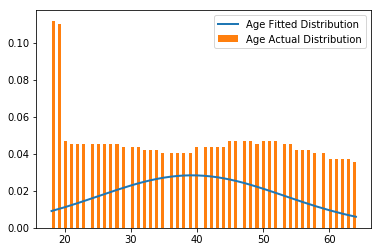

In [214]:
draw_skewness(df.age, "Age Actual Distribution", "Age Fitted Distribution")

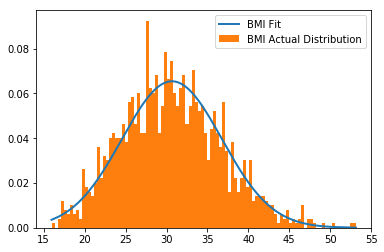

In [215]:
draw_skewness(df.bmi, "BMI Actual Distribution", "BMI Fit")

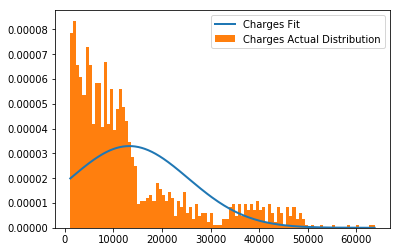

In [216]:
draw_skewness(df.charges, "Charges Actual Distribution", "Charges Fit")

*** 3.g Finding the outliers ***

In [98]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


*** From the above output it is evident that there are outliers(1.5 IQR > 75% ) for both bmi & charges. It is also seen in the below Box plots ***

* Age has no OUTLIERs

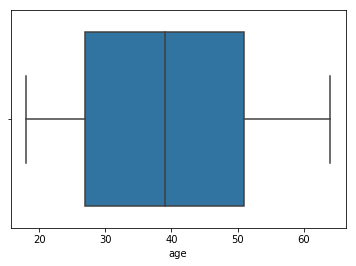

In [99]:
sns.boxplot(x='age', data=df)

* There are few outliers in BMI

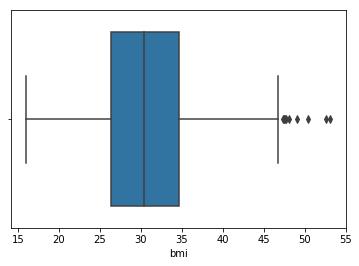

In [100]:
sns.boxplot(x='bmi',data=df)

* There are lots of OUTLIERS for CHARGES

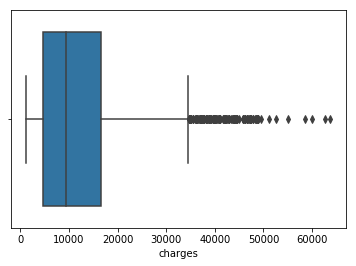

In [101]:
sns.boxplot(x='charges', data=df)

*** 3.h Distribuition of Categorical Columns ***

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


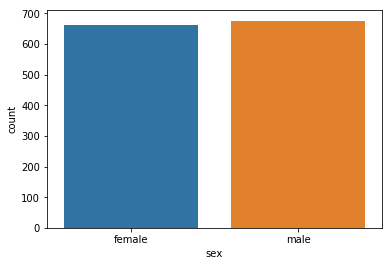

In [103]:
sns.countplot(x='sex', data=df)

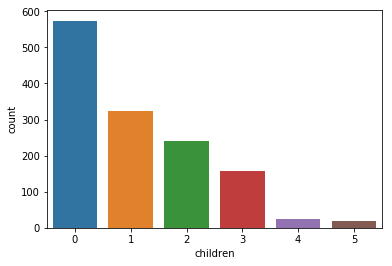

In [104]:
sns.countplot(x='children', data=df)

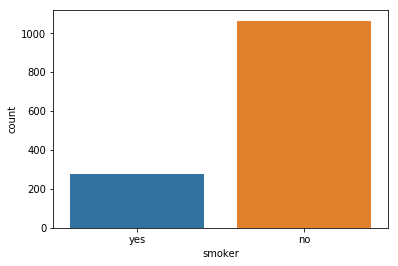

In [105]:
sns.countplot(x='smoker', data=df)

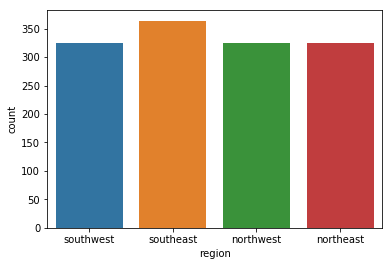

In [106]:
sns.countplot(x='region', data=df)

*** 3.i Pairplot for the Data Frame(including all the columns) ***

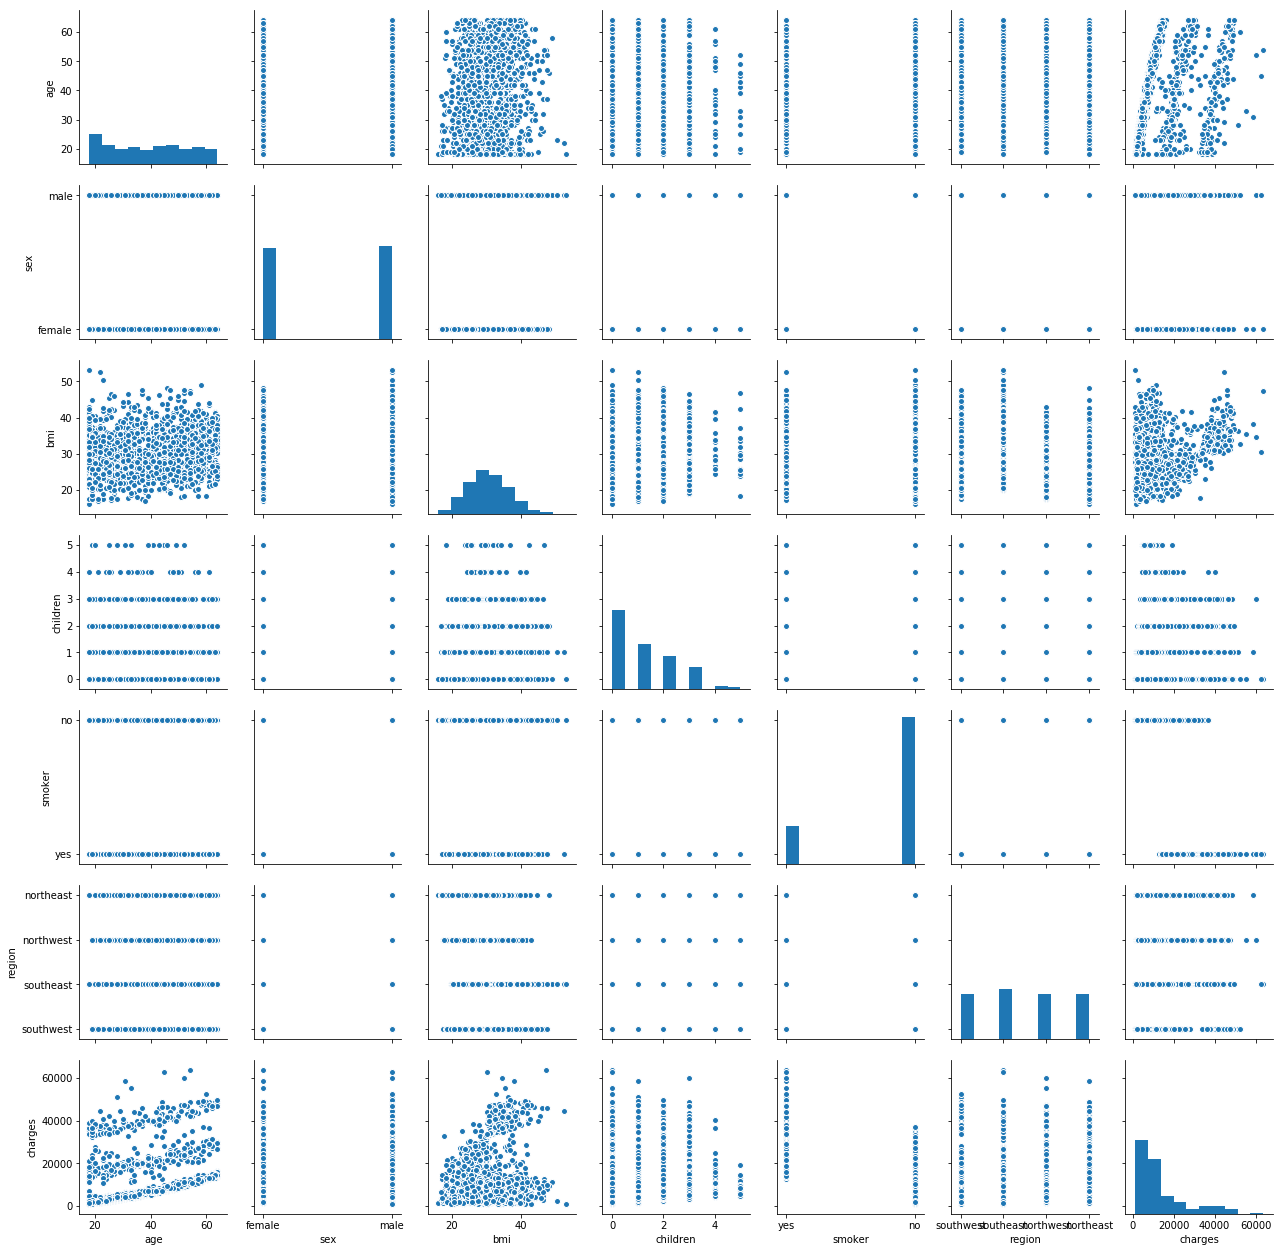

In [182]:
sns.pairplot(data=df, vars=df.columns)

*** 4. Statistical Evidences ***

*** 4.a Charges for Smokers vs Non-Smokers ***

Text(0,0.5,'Smoker?')

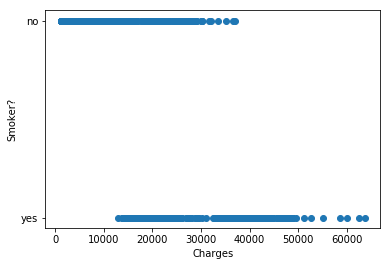

In [110]:
plt.scatter(x=df.charges, y=df.smoker)
plt.xlabel("Charges")
plt.ylabel("Smoker?")

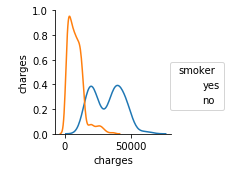

In [165]:
sns.pairplot(df, diag_kind='kde', hue='smoker',vars=['charges'])

***Hypothesis Definition***                                                                                         
Null Hypothesis $H_0$ : Charges(Smokers) == Charges(Non-Smokers)                                                                     

Alternate Hypothesis $H_A$ : Charges(Smokers) != Charges(Non-Smokers)

In [162]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('charges ~ smoker', data = df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq      df            F         PR(>F)
smoker    1.215199e+11     1.0  2177.614868  8.271436e-283
Residual  7.455432e+10  1336.0          NaN            NaN


**Conclusion:** pValue 8.271436e-283 < 5% Level of Significance(**α**). Hence we reject the $H_0$. So we conclude that Smoking has significant impact to the Insurance charges. 

*** 4.b BMI of Male vs Female ***

In [174]:
df_male = df[df.sex== 'male']
df_female = df[df.sex== 'female']
print("Data Frame for Male : ",df_male.shape)
print("Data Frame for Female : ", df_female.shape)

Data Frame for Male :  (676, 7)
Data Frame for Female :  (662, 7)


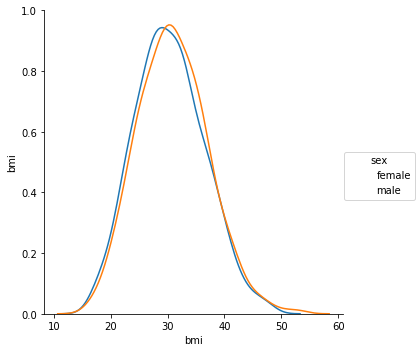

In [183]:
sns.pairplot(df, diag_kind='kde', hue='sex', vars=['bmi'], size=5)

***Hypothesis Definition***                                                                                         
Null Hypothesis $H_0$ : BMI(Male) == BMI(Female)                                                                     

Alternate Hypothesis $H_A$ : BMI(Male) != BMI(Female) 

In [180]:
mod = ols('bmi ~ sex', data = df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq      df        F    PR(>F)
sex         106.912532     1.0  2.87897  0.089976
Residual  49613.287854  1336.0      NaN       NaN


**Conclusion:** pValue 0.089976 > 5% Level of Significance(**α**). Hence we fail to reject $H_0$. This concludes that BMI(Male) and BMI(Female) does not vary significantly. 

*** 4.c Smokers vs Genders ***

$H_0$ : There is no relationship between **Gender** and **Smoking Habit**, i.e Smokers Ratio(Male) == Smokers Ratio(Female)

$H_A$ : There is significant relationship between **Gender** and **Smoking Habit**

***Hypothesis Definition***                                                                                         
Null Hypothesis $H_0$ : There is no relationship between **Gender** and **Smoking Habit**, i.e Smokers Ratio(Male) == Smokers Ratio(Female)                                                                     

Alternate Hypothesis $H_A$ : There is a relationship between **Gender** and **Smoking Habit**, i.e Smokers Ratio(Male) != Smokers Ratio(Female)

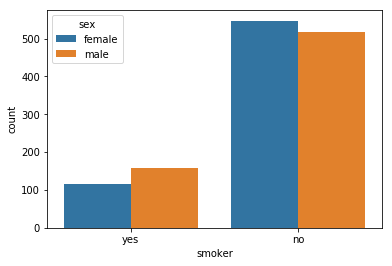

In [156]:
## Graphical Representation of Smoker Vs Gender
sns.countplot(x='smoker', data=df, hue='sex')

In [158]:
contigency_table = pd.crosstab(df.smoker, df.sex)
print("Contingency Table : \n",contigency_table)
print("\nObserved Values :\n")
print(contigency_table.values)
observed_values = contigency_table.values
b = stats.chi2_contingency(contigency_table)
expected_values = b[3]
print("\nExpected Values :\n")
print(expected_values)

Contingency Table : 
 sex     female  male
smoker              
no         547   517
yes        115   159

Observed Values :

[[547 517]
 [115 159]]

Expected Values :

[[526.43348281 537.56651719]
 [135.56651719 138.43348281]]


In [153]:
no_of_rows = len(contigency_table.iloc[0:2,0])
no_of_columns = len(contigency_table.iloc[0,:])
ddof = (no_of_rows-1) *(no_of_columns-1)
print("Degree of Freedom : ",ddof)
alpha = 0.05

Degree of Freedom :  1


In [159]:
from scipy.stats import chi2
chi_sq_values = sum([(o-e)**2/e for o,e in zip(observed_values, expected_values)])
chi_sq_calculated = chi_sq_values.sum()
print("Calculted Chi-Square Stats : ", chi_sq_calculated)

Calculted Chi-Square Stats :  7.765921028604451


In [160]:
critical_value = chi2.ppf(q = 1-alpha, df=ddof)
print("Critical Value : ", critical_value)

Critical Value :  3.841458820694124


* If Chi-Square > Critical Value, $H_0$ gets rejected.

**Conclusion:** As Chi-Square stats (**7.765921028604451**) > (**3.841458820694124**)Critical value, It is concluded that there is a relationship between **Gender** and **Smoking Habit**

*** 4.d Distribution of BMI across women wrt children count ***

Text(0,0.5,'Number of Children')

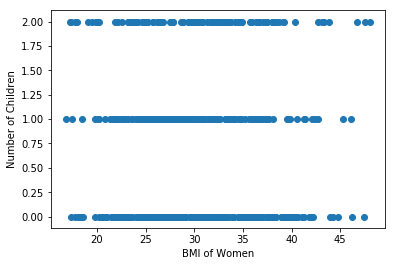

In [196]:
df_children = df[(df.sex == 'female') & (df.children < 3)]
plt.scatter(x='bmi', y='children', data=df_children)
plt.xlabel("BMI of Women")
plt.ylabel("Number of Children")

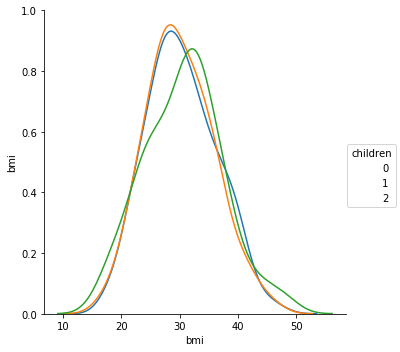

In [199]:
sns.pairplot(data=df_children, vars=['bmi'], diag_kind='kde', hue='children', size=5)

***Hypothesis Definition***                                                                                         
Null Hypothesis $H_0$ : BMI(No Children) == BMI(1 Child) == BMI(2 Children)                                                                     

Alternate Hypothesis $H_A$ : Atleast one of the BMI differs

In [201]:
mod = ols('bmi ~ children', data = df_children).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq     df         F   PR(>F)
children      2.512982    1.0  0.068411  0.79376
Residual  20717.738725  564.0       NaN      NaN


**Conclusion:** pValue 0.79376 > 5% Level of Significance(**α**). Hence we fail to reject $H_0$. This concludes that BMI across women with No Children, One Child and Two Children are the same. 